In [1]:
# !pip install keras

In [2]:
# !pip install tensorflow

In [3]:
import tensorflow as tf

2024-03-31 18:52:23.705445: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-31 18:52:23.705710: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-31 18:52:23.707708: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-31 18:52:23.732715: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-31 18:52:24.186487: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

In [4]:
import keras 
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

#### Generators used by CNN 
useful to process large amount of data 


In [5]:
train_ds = keras.utils.image_dataset_from_directory(
    directory='./data/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256))


validation_ds = keras.utils.image_dataset_from_directory(
    directory='./data/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256))

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


2024-03-31 18:52:25.345209: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-31 18:52:25.345530: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


 Images is stored in numpy array format   
 problem is numpy array value is 0 to 257    
So hume ishe Normalize krna hai   ki humare saare pixels ke value 0 to 1 ke beech hoo

In [6]:
## Normalize 


# def process(image,label):
#     image =  tf.cast(image/255. , tf.float32)
#     return image,label


# train_ds = train_ds.map(process)   #  operation hoke vahi store krte jaarhe 
# validation_ds = validation_ds.map(process)


def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [7]:
## CNN Model 


# Archi  ->  3 Conv layer


model = Sequential() 
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2,padding='valid', ))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2,padding='valid', ))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2,padding='valid'))


model.add(Flatten())

# Fully Connected Layers 
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/home/ankitmishralive/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [10]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 433s 690ms/step - accuracy: 0.5665 - loss: 2.8319 - val_accuracy: 0.6370 - val_loss: 0.7455
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 429s 686ms/step - accuracy: 0.6692 - loss: 0.6117 - val_accuracy: 0.6442 - val_loss: 0.6829
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 435s 696ms/step - accuracy: 0.7298 - loss: 0.5430 - val_accuracy: 0.6236 - val_loss: 0.7775
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 432s 691ms/step - accuracy: 0.7403 - loss: 0.5334 - val_accuracy: 0.7520 - val_loss: 0.5125
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 442s 707ms/step - accuracy: 0.7959 - loss: 0.4370 - val_accuracy: 0.8016 - val_loss: 0.4355
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 426s 681ms/step - accuracy: 0.8248 - loss: 0.3842 - val_accuracy: 0.6282 - val_loss: 0.9009
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 420s 671ms/step - accuracy: 0.8575 - loss: 0.3247 - val_accuracy: 0.7822 - val_loss: 0.6136
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 416s 665ms/step - accuracy: 0.8920 -

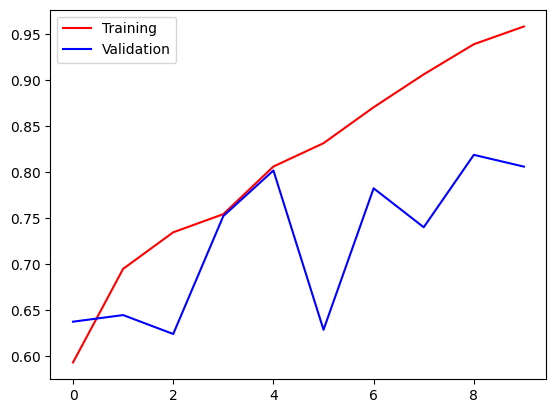

In [11]:
import matplotlib.pyplot as plt 

plt.plot(history.history['accuracy'],color='red',label='Training')
plt.plot(history.history['val_accuracy'],color='blue',label='Validation')

plt.legend()
plt.show() 

As this gap shows it is overfitting 

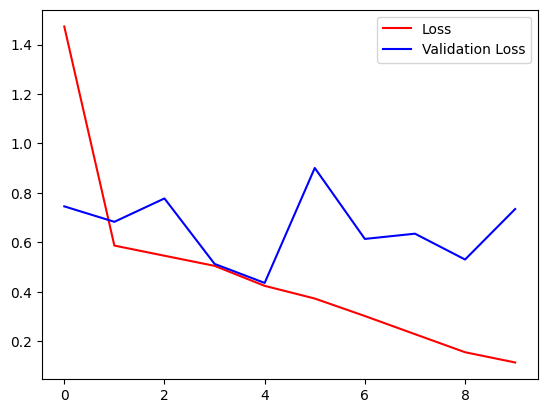

In [12]:
plt.plot(history.history['loss'],color='red',label='Loss')
plt.plot(history.history['val_loss'],color='blue',label='Validation Loss')

plt.legend()
plt.show() 

#### Overfitting 

### Ways to Reduce Overfitting 

1. Add more data 
2. Data Augmentation : we use existing data to create more data 
3. L1/L2 Regularizer 
4. Dropout 
5. Batch Normalization 
6. Reduce Complexity 


In [14]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 9.6 MB/s eta 0:00:00:00:0100:01


In [15]:
import cv2

In [16]:
test_img = cv2.imread('cattest.jpeg')

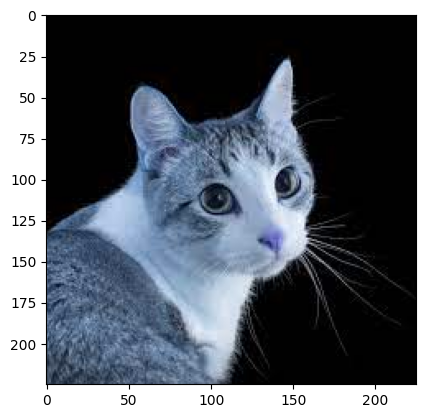

In [17]:
plt.imshow(test_img)

In [20]:
test_img.shape

(225, 225, 3)

In [21]:
test_img = cv2.resize(test_img,(256,256))

As batches mai data pass krte hai   
so  1 Image hai so   
hum ishe 4D tensor mai convert krrhe 

In [22]:
test_input = test_img.reshape((1,256,256,3))

In [24]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


array([[0.]], dtype=float32)

In [25]:
# 

In [35]:
test_img2 = cv2.imread('dogtest2.jpeg')

In [41]:
# plt.imshow(test_img2)

In [37]:
test_img2.shape

(183, 275, 3)

In [38]:
test_img2 = cv2.resize(test_img2,(256,256))

In [39]:
test_input2 = test_img2.reshape((1,256,256,3))

In [40]:
model.predict(test_input2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


array([[4.8619125e-16]], dtype=float32)